In [221]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

In [222]:
from sklearn.metrics import confusion_matrix

In [223]:
kospi_200_items = pd.read_excel('./기술지표.xlsx')

In [224]:
data = kospi_200_items
data.index = data['Frequency'].values

In [225]:
data

,Frequency,RSI,Stochastic%K,Stochastic%D,williamR,MACD,20-day sma,CCI,A/D,price
2010-01-04,2010-01-04,NaN,NaN,NaN,-19.354839,NaN,111741.666667,106.892208,-0.200000,119000
2010-01-05,2010-01-05,NaN,NaN,NaN,-77.419355,NaN,112233.333333,11.713776,0.000000,110000
2010-01-06,2010-01-06,NaN,NaN,NaN,-78.571429,NaN,112583.333333,-34.013605,0.555556,111000
2010-01-07,2010-01-07,NaN,NaN,NaN,-94.117647,NaN,112700.000000,-86.883876,0.076923,106000
2010-01-08,2010-01-08,NaN,19.444444,NaN,-82.051282,NaN,112691.666667,-125.521268,0.222222,106000
2010-01-11,2010-01-11,NaN,0.000000,NaN,-100.000000,NaN,112525.000000,-145.682002,0.250000,101500
2010-01-12,2010-01-12,NaN,13.636364,11.026936,-92.682927,NaN,112208.333333,-142.585551,1.000000,103000
2010-01-13,2010-01-13,NaN,5.000000,6.212121,-97.560976,NaN,111816.666667,-134.610835,0.250000,102000
2010-01-14,2010-01-14,NaN,33.333333,17.323232,-90.243902,NaN,111575.000000,-110.088616,1.250000,103500
2010-01-15,2010-01-15,NaN,86.666667,41.666667,-68.292683,NaN,111375.000000,-59.807956,1.000000,108000


In [29]:
# number : n일이동평균 / back: 몇일 전 이동평균
def making_SMA(data,number,back=0):
    ls = pd.DataFrame(np.zeros(number+back-1))
    
    for place in list(range(len(data)))[number+back-1:]:
        sumation = data['price'][list(range(place-number-back+1,place-back+1))].mean()
        sumation = pd.Series(sumation)
        ls = ls.append(sumation,ignore_index=True)
    ls.index = data.index
    return ls

In [49]:
# number : n일이동평균 / back: 몇일 전 이동평균
def making_WMA(data,number,back=0):
    ls = pd.DataFrame(np.zeros(number+back-1))
    
    for place in list(range(len(data)))[number+back-1:]:
        sumation = data['price'][list(range(place-number-back+1,place-back+1))]
        sumation2 = (np.array(sumation) * (np.array(range(number))+1)).sum() / (np.array(range(number))+1).sum()
        
        sumation2 = pd.Series(sumation2)
        ls = ls.append(sumation2,ignore_index=True)
    ls.index = data.index
    return ls

In [26]:
# number : forward+1 수익률 / back: 몇일 전 이동평균
def making_cate_revenue(data,forward=0):
    
    the_day_price = data['price'][0:len(data)-1-forward]
    next_day_price = data['price'][forward+1:]
    
    next_day_price.index = the_day_price.index
    
    ls = the_day_price < next_day_price
    ls = ls.append(pd.DataFrame([0]))
    return ls.astype('float64')

In [94]:
def making_Momentum(data,number):
    ls = pd.DataFrame(np.zeros(number))
    
    for place in list(range(len(data)))[number:]:
        if data['price'][place]>data['price'][place-number]:
            a = 1
        else:
            a = 0
        ls = ls.append(pd.Series(a),ignore_index=True)
    ls.index = data.index
    return ls

In [275]:
data['SMA10'] = making_SMA(pd.DataFrame(data['price']),10)

In [276]:
data['WMA10'] = making_WMA(pd.DataFrame(data['price']),10)

In [228]:
data['revenue_2'] = making_cate_revenue(data)

In [229]:
data['Momentum'] = making_Momentum(data,5)

In [277]:
final_data = data[['RSI', 'Stochastic%K', 'Stochastic%D', 'williamR', 'MACD',
       'CCI', 'A/D', 'SMA10', 'WMA10','Momentum','price','revenue_2']]

In [316]:
final_data.to_excel('./dataset.xlsx',encoding='utf-8')

In [294]:
simple = final_data[20:-1]

In [299]:
simple.columns

Index(['RSI', 'Stochastic%K', 'Stochastic%D', 'williamR', 'MACD', 'CCI', 'A/D',
       'SMA10', 'WMA10', 'Momentum', 'price', 'revenue_2'],
      dtype='object')

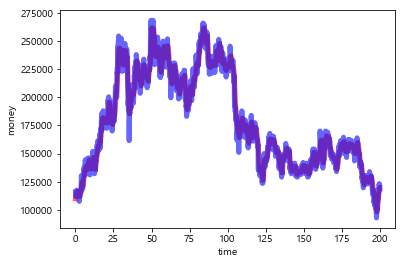

In [314]:
# Create some sample "time-series" data 
T = np.linspace(0, 200, len(simple))

pargs = {"lw":5, "alpha":.6} 

plt.plot(T,simple['SMA10'], 'r',**pargs) 
plt.plot(T,simple['price'], 'b', **pargs) 


plt.xlabel("time") 
plt.ylabel("money") 
plt.axis('tight') 

# Save as a png and a pdf 
plt.savefig("example.png") 
plt.savefig("example.pdf") 

plt.show() 


In [297]:
len(np.linspace(0, 20, len(simple)) )

2199

In [308]:
simple['price'].T.shape

(2199,)

In [309]:
T = len(np.linspace(0, 20, len(simple)) )

In [311]:
[T]

[2199]

## 논문대로 전처리과정

In [149]:
final_data

,RSI,Stochastic%K,Stochastic%D,williamR,MACD,CCI,A/D,SMA5,WMA5,Momentum,price,revenue_2
2010-01-04,NaN,NaN,NaN,-19.354839,NaN,106.892208,-0.200000,0.0,0.000000,0.0,119000,0.0
2010-01-05,NaN,NaN,NaN,-77.419355,NaN,11.713776,0.000000,0.0,0.000000,0.0,110000,1.0
2010-01-06,NaN,NaN,NaN,-78.571429,NaN,-34.013605,0.555556,0.0,0.000000,0.0,111000,0.0
2010-01-07,NaN,NaN,NaN,-94.117647,NaN,-86.883876,0.076923,0.0,0.000000,0.0,106000,0.0
2010-01-08,NaN,19.444444,NaN,-82.051282,NaN,-125.521268,0.222222,110400.0,108400.000000,0.0,106000,0.0
2010-01-11,NaN,0.000000,NaN,-100.000000,NaN,-145.682002,0.250000,106900.0,105433.333333,0.0,101500,1.0
2010-01-12,NaN,13.636364,11.026936,-92.682927,NaN,-142.585551,1.000000,105500.0,104133.333333,0.0,103000,0.0
2010-01-13,NaN,5.000000,6.212121,-97.560976,NaN,-134.610835,0.250000,103700.0,102966.666667,0.0,102000,1.0
2010-01-14,NaN,33.333333,17.323232,-90.243902,NaN,-110.088616,1.250000,103200.0,102900.000000,0.0,103500,1.0
2010-01-15,NaN,86.666667,41.666667,-68.292683,NaN,-59.807956,1.000000,103600.0,104500.000000,1.0,108000,0.0


In [150]:
preprocessing = pd.DataFrame([],index=final_data.index)

In [72]:
preprocessing

""
2010-01-04
2010-01-05
2010-01-06
2010-01-07
2010-01-08
2010-01-11
2010-01-12
2010-01-13
2010-01-14
2010-01-15


In [278]:
a = final_data['SMA10'] < final_data['price']
sma10 = a.astype(np.int)

In [279]:
b = final_data['WMA10'] < final_data['price']
wma10 = b.astype(np.int)

In [153]:
Momentum = final_data['Momentum']

In [158]:
present0 = final_data['Stochastic%K'][1:]
pre0 = final_data['Stochastic%K'][:-1]
pre0.index = present0.index
c = present0 > pre0
Stochastic_K = c.astype(np.int)

In [159]:
present1 = final_data['Stochastic%D'][1:]
pre1 = final_data['Stochastic%D'][:-1]
pre1.index = present1.index
d = present1 > pre1
Stochastic_D = d.astype(np.int)

In [160]:
present2 = final_data['MACD'][1:]
pre2 = final_data['MACD'][:-1]
pre2.index = present2.index
e = present2 > pre2
MACD = e.astype(np.int)

In [161]:
present3 = final_data['williamR'][1:]
pre3 = final_data['williamR'][:-1]
pre3.index = present3.index
f = present3 > pre3
williamR = f.astype(np.int)

In [162]:
present4 = final_data['A/D'][1:]
pre4 = final_data['A/D'][:-1]
pre4.index = present4.index
g = present4 > pre4
AD = g.astype(np.int)

In [234]:
## RSI 변수
rsi = pd.DataFrame([0])
tt  = final_data['RSI']
for n in list(range(len(final_data)))[1:]:
    value = np.nan
    
    if tt[n] > 70:
        value = -1
    elif tt[n] < 30:
        value = 1
    else:
        if tt[n] > tt[n-1]:
            value = 1
        else:
            value = -1
    rsi = rsi.append(pd.DataFrame([value]))
rsi.index = final_data.index

In [232]:
## CCI
CCI = pd.DataFrame([0])
tt  = final_data['CCI']
for n in list(range(len(final_data)))[1:]:
    value = np.nan
    
    if tt[n] > 200:
        value = -1
    elif tt[n] < -200:
        value = 1
    else:
        if tt[n] > tt[n-1]:
            value = 1
        else:
            value = -1
    CCI = CCI.append(pd.DataFrame([value]))
CCI.index = final_data.index

In [280]:
dataset = pd.concat([preprocessing,sma5,wma5,Momentum,Stochastic_K,Stochastic_D,
           rsi.replace(-1,0),MACD,williamR, AD,CCI,final_data['revenue_2']],axis=1)

In [281]:
dataset.columns=['Sma5','Wma5','Momentum','Stochastic_K','Stochastic_D',
           'RSI','MACD','WilliamR', 'AD','CCI','revenue_2']

In [282]:
F_dataset = dataset[1:-1]

In [283]:
F_dataset

,Sma5,Wma5,Momentum,Stochastic_K,Stochastic_D,RSI,MACD,WilliamR,AD,CCI,revenue_2
2010-01-05,1,1,0.0,0.0,0.0,0,0.0,0.0,1.0,-1,1.0
2010-01-06,1,1,0.0,0.0,0.0,0,0.0,0.0,1.0,-1,0.0
2010-01-07,1,1,0.0,0.0,0.0,0,0.0,0.0,0.0,-1,0.0
2010-01-08,0,0,0.0,0.0,0.0,0,0.0,1.0,1.0,-1,0.0
2010-01-11,0,0,0.0,0.0,0.0,0,0.0,0.0,1.0,-1,1.0
2010-01-12,0,0,0.0,1.0,0.0,0,0.0,1.0,1.0,1,0.0
2010-01-13,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,1.0
2010-01-14,1,1,0.0,1.0,1.0,0,0.0,1.0,1.0,1,1.0
2010-01-15,1,1,1.0,1.0,1.0,0,0.0,1.0,0.0,1,0.0
2010-01-18,1,1,1.0,0.0,1.0,0,0.0,0.0,0.0,1,0.0


In [284]:
cols = F_dataset.columns

In [285]:
cols

Index(['Sma5', 'Wma5', 'Momentum', 'Stochastic_K', 'Stochastic_D', 'RSI',
       'MACD', 'WilliamR', 'AD', 'CCI', 'revenue_2'],
      dtype='object')

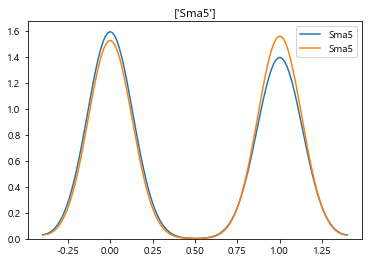

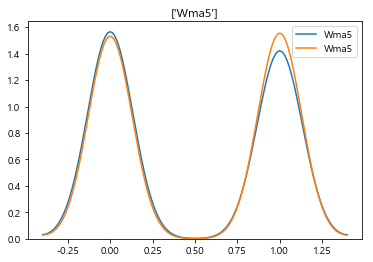

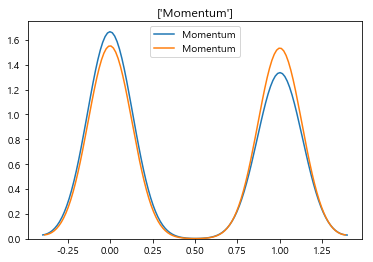

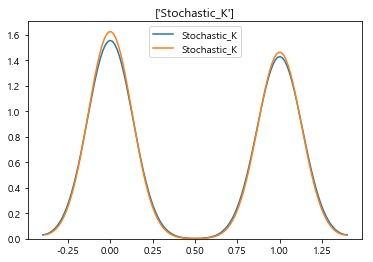

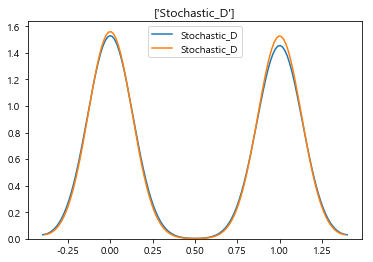

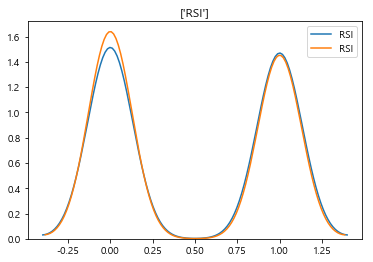

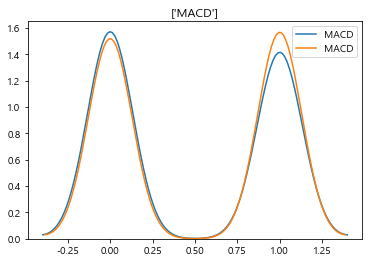

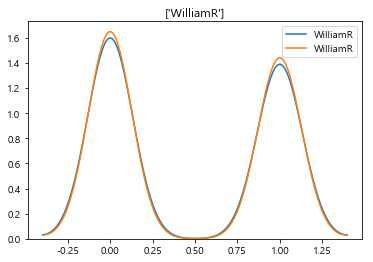

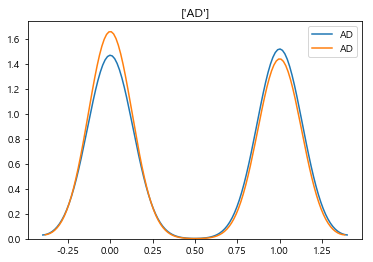

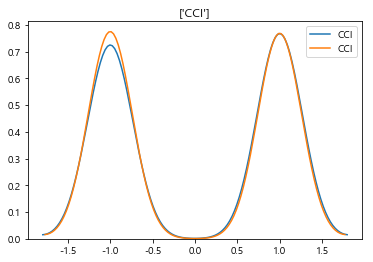

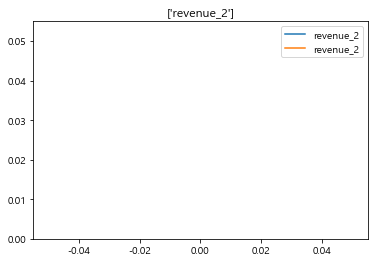

In [286]:
for i in cols:
        sns.kdeplot(data=F_dataset[F_dataset['revenue_2'] == 1][i])
        sns.kdeplot(data=F_dataset[F_dataset['revenue_2'] == 0][i])
        plt.title([i])
        plt.show()     

In [287]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(F_dataset[['Sma5','Wma5','Momentum','Stochastic_K',
        'Stochastic_D', 'RSI','MACD','WilliamR', 'AD','CCI']] , F_dataset['revenue_2'] )

In [288]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1663, 10) (555, 10) (1663,) (555,)


In [289]:
from sklearn.linear_model import LogisticRegression
for col in cols[:-1]:
    XX_train = X_train[[col]]
    XX_test = X_test[[col]]
    model=LogisticRegression()
    model.fit(XX_train,Y_train)
    prediction7=model.predict(XX_test)
    ##0.5348564733450498 -1 비율
    print('The accuracy of the LogisticRegression is',metrics.accuracy_score(prediction7,Y_test),'\n',metrics.confusion_matrix(Y_test,prediction7))

The accuracy of the LogisticRegression is 0.5261261261261261 
 [[292   0]
 [263   0]]
The accuracy of the LogisticRegression is 0.5261261261261261 
 [[292   0]
 [263   0]]
The accuracy of the LogisticRegression is 0.5261261261261261 
 [[292   0]
 [263   0]]
The accuracy of the LogisticRegression is 0.5261261261261261 
 [[292   0]
 [263   0]]
The accuracy of the LogisticRegression is 0.5261261261261261 
 [[292   0]
 [263   0]]
The accuracy of the LogisticRegression is 0.5261261261261261 
 [[292   0]
 [263   0]]
The accuracy of the LogisticRegression is 0.5261261261261261 
 [[292   0]
 [263   0]]
The accuracy of the LogisticRegression is 0.5261261261261261 
 [[292   0]
 [263   0]]
The accuracy of the LogisticRegression is 0.5261261261261261 
 [[292   0]
 [263   0]]
The accuracy of the LogisticRegression is 0.5261261261261261 
 [[292   0]
 [263   0]]


In [266]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

0.5333333333333333


<Figure size 2880x2160 with 0 Axes>

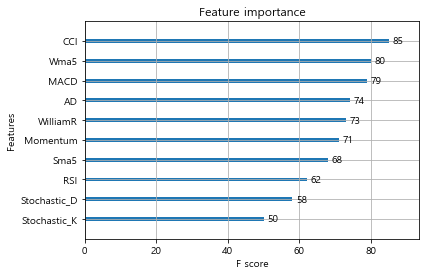

In [290]:
from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost

model = XGBClassifier()
model.fit(X_train[['Sma5','Wma5','Momentum','Stochastic_K',
        'Stochastic_D', 'RSI','MACD','WilliamR', 'AD','CCI']],Y_train)
plt.figure(figsize=(40,30))
plot_importance(model)
# plt.show()
a = model.predict(X_test[['Sma5','Wma5','Momentum','Stochastic_K',
        'Stochastic_D', 'RSI','MACD','WilliamR', 'AD','CCI']])
print(metrics.accuracy_score(a,Y_test))

In [291]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=3)

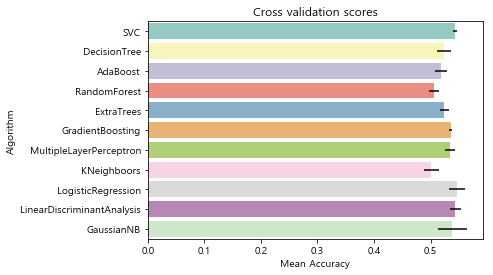

In [292]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(GaussianNB())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'GaussianNB']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
